## Web scraping from instagram

Attempt to generate demand metrics from likes/comments/views from instagram metrics.

Initial thoughts =&gt; metrics in terms of least to most rare: views (v) (if applicable) &lt; likes (l) &lt; comments (c)

Maybe can have some kind of weighted mean equation relating all of them (0.1v + 0.3l + 0.6c = engagement)

## Ok let's start

### 1) Getting data from instagram

Fortunately, there's a service that already web scrapes instagram pages for you (https://console.apify.com/actors#/store). Only have to type in the page you want. Decided to start first with "freshly" =&gt; data dumped in Freshly.json

### 2) Exploring data

In [ ]:
import pandas as pd

df = pd.read_json("Freshly.json")
df.head()

,id,username,fullName,biography,externalUrl,externalUrlShimmed,followersCount,followsCount,hasChannel,highlightReelCount,...,profilePicUrlHD,facebookPage,igtvVideoCount,relatedProfiles,latestIgtvVideos,postsCount,latestPosts,following,followedBy,taggedPosts
0,1478278542,freshly,Freshly,"We do the cooking, you do you. 🍽\nFresh prepar...",https://getfresh.ly/linkinbio,https://l.instagram.com/?u=https%3A%2F%2Fgetfr...,326237,15,False,3,...,https://instagram.fmmx1-1.fna.fbcdn.net/v/t51....,NaN,7,[],"[{'type': 'Video', 'shortCode': 'CXbUzdzlsVl',...",1703,"[{'id': '2806227003505907101', 'type': 'Sideca...",[],[],[]


We see there's 2 fields that are important for us: latestIgtvVideos and latestPosts. Let's start with latestPosts.

In [ ]:
data = df["latestPosts"][0]
pd.DataFrame.from_dict(data)

,id,type,shortCode,caption,hashtags,mentions,url,commentsCount,firstComment,latestComments,...,timestamp,childPosts,locationName,locationId,ownerFullName,ownerUsername,ownerId,videoUrl,videoViewCount,productType
0,2806227003505907101,Sidecar,CbxuJd3FBWd,"Bring out the confetti, a new meal just droppe...",[],[],https://www.instagram.com/p/CbxuJd3FBWd/,2,,[],...,2022-03-31T17:39:09.000Z,"[{'id': '2806226999999496942', 'type': 'Image'...",None,None,None,freshly,1478278542,NaN,NaN,NaN
1,2805483219601579742,Video,CbvFB_Hq97e,Spring Produce Guide 🛒,[],[],https://www.instagram.com/p/CbvFB_Hq97e/,1,,[],...,2022-03-30T17:01:45.000Z,[],None,None,None,freshly,1478278542,https://instagram.fmmx1-1.fna.fbcdn.net/v/t50....,971.0,clips
2,2805433332194829923,Sidecar,Cbu5sB2g2Zj,"The list is in! Based on our customer ratings,...",[],[],https://www.instagram.com/p/Cbu5sB2g2Zj/,6,,[],...,2022-03-30T15:22:16.000Z,"[{'id': '2805433327069412471', 'type': 'Image'...",None,None,None,freshly,1478278542,NaN,NaN,NaN
3,2804772895831984874,Image,CbsjhajtYrq,"""Freshly completely eliminates the hassle of c...",[],[cameronandtia],https://www.instagram.com/p/CbsjhajtYrq/,0,,[],...,2022-03-29T17:30:08.000Z,[],None,None,None,freshly,1478278542,NaN,NaN,NaN
4,2803989551876644350,Image,CbpxaQpg53-,Are you in a work from home rut? 🏠 💻 Start try...,"[freshly, wfh, homeoffice, selfcare, tips]",[],https://www.instagram.com/p/CbpxaQpg53-/,12,,[],...,2022-03-28T15:33:44.000Z,[],None,None,None,freshly,1478278542,NaN,NaN,NaN
5,2802523190057320595,Image,Cbkj_4yKUCT,Spinach is the mealtime super hero you didn't ...,"[freshly, nationalspinachday, spinach]",[],https://www.instagram.com/p/Cbkj_4yKUCT/,0,,[],...,2022-03-26T15:00:25.000Z,[],None,None,None,freshly,1478278542,NaN,NaN,NaN
6,2801254234745980695,Sidecar,CbgDeKDl8cX,🗣️Calling all cheese heads! Our Cheesy Vegetab...,[],[],https://www.instagram.com/p/CbgDeKDl8cX/,7,,[],...,2022-03-24T20:59:08.000Z,"[{'id': '2801254231323346185', 'type': 'Image'...",None,None,None,freshly,1478278542,NaN,NaN,NaN
7,2800535237717046106,Video,Cbdf_X5FrNa,BRB falling more and more in love with complex...,[],[],https://www.instagram.com/p/Cbdf_X5FrNa/,3,,[],...,2022-03-23T21:10:46.000Z,[],None,None,None,freshly,1478278542,https://instagram.fmmx1-1.fna.fbcdn.net/v/t50....,3098.0,clips
8,2797630831138189719,Image,CbTLmserDGX,Things you should know if you LOVE potatoes:\n...,"[freshly, nationalnutritionmonth, potatoes]",[],https://www.instagram.com/p/CbTLmserDGX/,12,,[],...,2022-03-19T21:00:08.000Z,[],None,None,None,freshly,1478278542,NaN,NaN,NaN
9,2796035540259013740,Sidecar,CbNg4KEgYRs,For those nights where you're feelin' fancy in...,[],[],https://www.instagram.com/p/CbNg4KEgYRs/,16,,[],...,2022-03-17T16:10:32.000Z,"[{'id': '2796035381101897857', 'type': 'Video'...",None,None,None,freshly,1478278542,NaN,NaN,NaN


Next few blocks below involve messing around with data (EDA)

In [ ]:
post_attributes = df["latestPosts"][0][0]

for attribute in post_attributes:
    print(attribute)

id
type
shortCode
caption
hashtags
mentions
url
commentsCount
firstComment
latestComments
dimensionsHeight
dimensionsWidth
displayUrl
images
alt
likesCount
timestamp
childPosts
locationName
locationId
ownerFullName
ownerUsername
ownerId


In [ ]:
posts = df["latestPosts"][0]

for post in posts:
    print(post['timestamp'])

2022-03-31T17:39:09.000Z
2022-03-30T17:01:45.000Z
2022-03-30T15:22:16.000Z
2022-03-29T17:30:08.000Z
2022-03-28T15:33:44.000Z
2022-03-26T15:00:25.000Z
2022-03-24T20:59:08.000Z
2022-03-23T21:10:46.000Z
2022-03-19T21:00:08.000Z
2022-03-17T16:10:32.000Z
2022-03-16T14:12:40.000Z
2022-03-15T20:00:11.000Z


In [ ]:
likes = [post["likesCount"] for post in posts]
comments = [post["commentsCount"] for post in posts]
times = [pd.to_datetime(post["timestamp"]) for post in posts]
post_data = {'likes': likes, 'comments': comments, 'time': times}
post_df = pd.DataFrame(post_data)
post_df

,likes,comments,time
0,34,2,2022-03-31 17:39:09+00:00
1,23,1,2022-03-30 17:01:45+00:00
2,44,6,2022-03-30 15:22:16+00:00
3,103,0,2022-03-29 17:30:08+00:00
4,51,12,2022-03-28 15:33:44+00:00
5,26,0,2022-03-26 15:00:25+00:00
6,68,7,2022-03-24 20:59:08+00:00
7,45,3,2022-03-23 21:10:46+00:00
8,93,12,2022-03-19 21:00:08+00:00
9,70,16,2022-03-17 16:10:32+00:00


In [ ]:
post_df.sort_values(by="time")

,likes,comments,time
11,45,0,2022-03-15 20:00:11+00:00
10,97,4,2022-03-16 14:12:40+00:00
9,70,16,2022-03-17 16:10:32+00:00
8,93,12,2022-03-19 21:00:08+00:00
7,45,3,2022-03-23 21:10:46+00:00
6,68,7,2022-03-24 20:59:08+00:00
5,26,0,2022-03-26 15:00:25+00:00
4,51,12,2022-03-28 15:33:44+00:00
3,103,0,2022-03-29 17:30:08+00:00
2,44,6,2022-03-30 15:22:16+00:00


Too little data, realized API messed up =&gt; decided to tinker around again

In [ ]:
df = pd.read_json("InstagramData/Freshly.json")
df.head()

,queryUsername,position,id,type,shortCode,caption,hashtags,mentions,url,commentsCount,...,timestamp,childPosts,locationName,locationId,ownerFullName,ownerUsername,ownerId,videoUrl,videoViewCount,productType
0,freshly,1,2806227003505907200,Sidecar,CbxuJd3FBWd,"Bring out the confetti, a new meal just droppe...",[],[],https://www.instagram.com/p/CbxuJd3FBWd/,2,...,2022-03-31 17:39:09+00:00,"[{'id': '2806226999999496942', 'type': 'Image'...",NaN,NaN,NaN,freshly,1478278542,NaN,NaN,NaN
1,freshly,2,2805483219601579520,Video,CbvFB_Hq97e,Spring Produce Guide 🛒,[],[],https://www.instagram.com/p/CbvFB_Hq97e/,1,...,2022-03-30 17:01:45+00:00,[],NaN,NaN,NaN,freshly,1478278542,https://instagram.fkul10-1.fna.fbcdn.net/v/t50...,990.0,clips
2,freshly,3,2805433332194829824,Sidecar,Cbu5sB2g2Zj,"The list is in! Based on our customer ratings,...",[],[],https://www.instagram.com/p/Cbu5sB2g2Zj/,6,...,2022-03-30 15:22:16+00:00,"[{'id': '2805433327069412471', 'type': 'Image'...",NaN,NaN,NaN,freshly,1478278542,NaN,NaN,NaN
3,freshly,4,2804772895831984640,Image,CbsjhajtYrq,"""Freshly completely eliminates the hassle of c...",[],[cameronandtia],https://www.instagram.com/p/CbsjhajtYrq/,0,...,2022-03-29 17:30:08+00:00,[],NaN,NaN,NaN,freshly,1478278542,NaN,NaN,NaN
4,freshly,5,2803989551876644352,Image,CbpxaQpg53-,Are you in a work from home rut? 🏠 💻 Start try...,"[freshly, wfh, homeoffice, selfcare, tips]",[],https://www.instagram.com/p/CbpxaQpg53-/,12,...,2022-03-28 15:33:44+00:00,[],NaN,NaN,NaN,freshly,1478278542,NaN,NaN,NaN


In [ ]:
posts_df = df[['likesCount', 'commentsCount', 'timestamp']]
posts_df.head()

,likesCount,commentsCount,timestamp
0,34,2,2022-03-31 17:39:09+00:00
1,23,1,2022-03-30 17:01:45+00:00
2,45,6,2022-03-30 15:22:16+00:00
3,103,0,2022-03-29 17:30:08+00:00
4,51,12,2022-03-28 15:33:44+00:00


In [ ]:
posts_df.sort_values(by="timestamp")

,likesCount,commentsCount,timestamp
130,169,1,2021-06-10 21:05:31+00:00
129,184,13,2021-06-15 21:51:47+00:00
128,252,12,2021-06-16 21:31:06+00:00
127,346,48,2021-06-17 21:05:45+00:00
126,216,14,2021-06-18 21:05:32+00:00
...,...,...,...
4,51,12,2022-03-28 15:33:44+00:00
3,103,0,2022-03-29 17:30:08+00:00
2,45,6,2022-03-30 15:22:16+00:00
1,23,1,2022-03-30 17:01:45+00:00


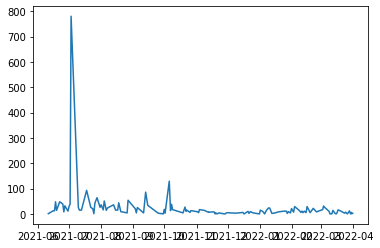

In [ ]:
import matplotlib.pyplot as plt
plt.plot(posts_df['timestamp'], posts_df['commentsCount'])

In [ ]:
score = posts_df['likesCount']*posts_df['commentsCount']
print(sum(score)/posts_df.shape[0])
print(posts_df.shape[0])

7428.557251908397
131


Made calcHype function to take in a company name and optional weighted parameters

In [ ]:
def calcHype(company, a = 0.5, b = 1):
    path = "InstagramData/" + company + ".json"
    df = pd.read_json(path)
    posts_df = df[['timestamp', 'likesCount', 'commentsCount']]
    posts_df.sort_values(by="timestamp")
    plt.plot(posts_df['timestamp'], posts_df['likesCount'])
    print(posts_df.head())
    score = a * posts_df['likesCount'] + b * posts_df['commentsCount']
    return sum(score)//posts_df.shape[0]


                  timestamp  likesCount  commentsCount
0 2022-03-31 17:39:09+00:00          34              2
1 2022-03-30 17:01:45+00:00          23              1
2 2022-03-30 15:22:16+00:00          45              6
3 2022-03-29 17:30:08+00:00         103              0
4 2022-03-28 15:33:44+00:00          51             12


99.0

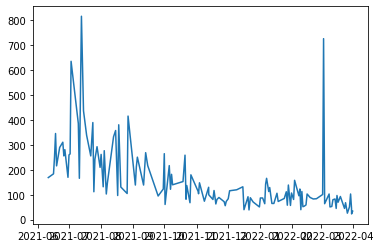

In [ ]:
calcHype("Freshly")

                  timestamp  likesCount  commentsCount
0 2022-04-27 22:31:30+00:00         708             20
1 2022-04-26 22:14:00+00:00         828             58
2 2022-04-26 16:21:45+00:00         152              6
3 2022-04-25 22:21:56+00:00         402             12
4 2022-04-24 14:20:06+00:00         316             19


380.0

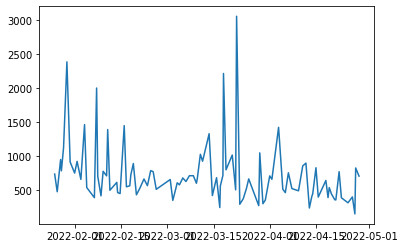

In [ ]:
calcHype("SakaraLife")

                  timestamp  likesCount  commentsCount
0 2022-04-28 02:06:56+00:00          81              4
1 2022-04-27 00:03:48+00:00          41              5
2 2022-04-26 01:05:35+00:00          42              0
3 2022-04-23 01:00:19+00:00          84              5
4 2022-04-22 01:06:05+00:00          36              3


63.0

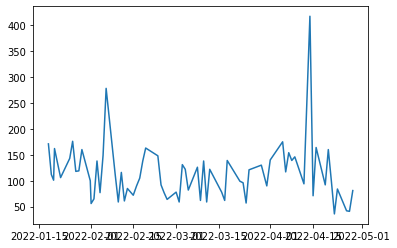

In [ ]:
calcHype("Homechef")

In [ ]:
import seaborn as sns

In [ ]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
pd.DataFrame
#ax = sns.barplot(x="Company", y="Hype Score", data=tips)

pandas.core.frame.DataFrame

                  timestamp  likesCount  commentsCount
0 2022-04-27 17:00:20+00:00          47              1
1 2022-04-26 23:00:20+00:00          41              1
2 2022-04-26 15:00:20+00:00          70              4
3 2022-04-25 17:00:20+00:00          63              4
4 2022-04-24 17:00:20+00:00         127             12


41.0

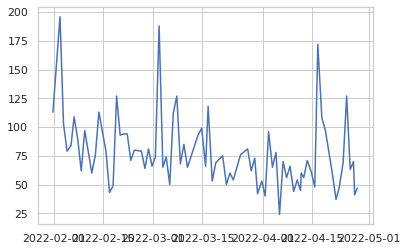

In [ ]:
calcHype("Greenchef")

                  timestamp  likesCount  commentsCount
0 2022-03-31 17:39:09+00:00          34              2
1 2022-03-30 17:01:45+00:00          23              1
2 2022-03-30 15:22:16+00:00          45              6
3 2022-03-29 17:30:08+00:00         103              0
4 2022-03-28 15:33:44+00:00          51             12
                  timestamp  likesCount  commentsCount
0 2022-04-27 17:00:20+00:00          47              1
1 2022-04-26 23:00:20+00:00          41              1
2 2022-04-26 15:00:20+00:00          70              4
3 2022-04-25 17:00:20+00:00          63              4
4 2022-04-24 17:00:20+00:00         127             12
                  timestamp  likesCount  commentsCount
0 2022-04-28 02:06:56+00:00          81              4
1 2022-04-27 00:03:48+00:00          41              5
2 2022-04-26 01:05:35+00:00          42              0
3 2022-04-23 01:00:19+00:00          84              5
4 2022-04-22 01:06:05+00:00          36              3
          

[99.0, 41.0, 63.0, 380.0, 60.0]

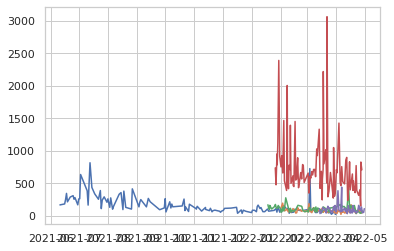

In [ ]:
companies = ['Freshly', 'Greenchef', 'Homechef', 'SakaraLife', 'Feast&Fettle']
hype = []
for company in companies:
    hype.append(calcHype(company))

hype

In [ ]:
import numpy as np
from sklearn import preprocessing
hype = np.array(hype)
normalized_hype = preprocessing.normalize([hype])
print(normalized_hype)

comp_data = {'Company': companies,
        'Hype': normalized_hype[0]}

[[0.24487328 0.10141217 0.15582845 0.93991765 0.14840805]]


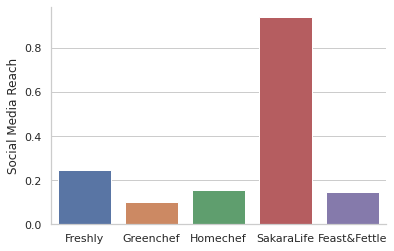

In [ ]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="Company", y="Hype", data=comp_data) 
ax.set_ylabel("Social Media Reach")
sns.despine()


# Final Bar Chart generated above using calcHype()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9e88faaf-ade4-4526-a9d5-3a022b266140' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>